In [317]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/03%20-%20Data%20Preprocessing/student_assignment.csv

In [318]:
student=pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/03%20-%20Data%20Preprocessing/student_assignment.csv',sep=',')

In [319]:
student

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [320]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [321]:
student.shape

(104, 6)

In [322]:
student[student['Age'].isna()]

,Age,Income,Is Student,Num Children,Temperature,Rating
2,NaN,45124.06,False,5.0,36.9,3.9


In [323]:
student[student.duplicated()]

,Age,Income,Is Student,Num Children,Temperature,Rating
100,35.0,27089.59,True,5.0,35.3,1.6
102,39.0,61868.49,True,5.0,37.1,3.8
103,47.0,59526.59,False,3.0,36.7,3.2


In [324]:
student=student.drop_duplicates()

In [325]:
student.shape

(101, 6)

In [326]:
student['Age'].mean()

53.31

In [327]:
student['Age'].median()

42.0

In [328]:
student.columns

Index(['Age', 'Income', 'Is Student', 'Num Children', 'Temperature', 'Rating'], dtype='object')

<Axes: >

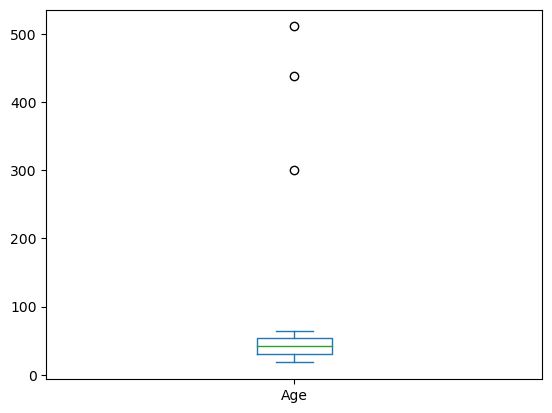

In [329]:
student['Age'].plot(kind='box')

data['Age'] = data['Age'].astype('int')

In [330]:
student['Age']=student['Age'].astype('Int64')

C:\Users\Vineeth Manokaran\AppData\Local\Temp\ipykernel_11628\1820986636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student['Age']=student['Age'].astype('Int64')


#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

In [331]:
for col_name in student.select_dtypes(include=np.number).columns[:]:
    print(col_name)
    q1=student[col_name].quantile(0.25)
    q3=student[col_name].quantile(0.75)
    iqr=q3-q1
    
    low=q1-1.5*(iqr)
    high=q3+1.5*(iqr)
    
    print("Outliers =",student.loc[(student[col_name]<low ) | (student[col_name]>high),col_name])


Age
Outliers = 7     511
19    301
47    438
Name: Age, dtype: Int64
Income
Outliers = Series([], Name: Income, dtype: float64)
Num Children
Outliers = 82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers = Series([], Name: Temperature, dtype: float64)
Rating
Outliers = 57    -3.2
99    10.9
Name: Rating, dtype: float64


In [332]:
student=student[~(student['Age']>100)]

In [333]:
student['Age'].mean()

42.07216494845361

In [334]:
student['Age'].median()

41.0

In [335]:
student['Age'].fillna(student['Age'].mean())

0      43
1      56
3      37
4      53
5      54
       ..
96     48
97     58
98     50
99     42
101    61
Name: Age, Length: 97, dtype: Int64

In [336]:
student.shape

(97, 6)

In [337]:
student

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43,45893.41,True,0.0,38.2,2.6
1,56,69663.07,True,1.0,38.7,3.2
3,37,76724.60,False,2.0,41.6,2.5
4,53,58343.03,False,1.0,36.5,3.3
5,54,31161.17,True,5.0,37.4,4.1
...,...,...,...,...,...,...
96,48,90964.58,False,2.0,38.9,3.9
97,58,70679.33,True,4.0,41.3,4.8
98,50,97052.37,True,2.0,37.1,4.6
99,42,46673.04,False,5.0,38.8,10.9


In [339]:
student.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    2
Temperature     0
Rating          0
dtype: int64

In [340]:
student['Num Children'].mean()

3.031578947368421

In [341]:
student['Num Children'].median()

3.0

In [344]:
student['Num Children']=student['Num Children'].fillna(student['Num Children'].mean())

In [345]:
student['Num Children'].isna().sum()

0

In [349]:
student['Is Student'].unique()

array(['True', 'False', 'NO', 'Yes', 'false', 'true', 'YES'], dtype=object)

In [352]:
student['Is Student'] = student['Is Student'].replace({'NO':'False' , 'false':'False' , 'Yes':'True' , 'true':'True', 'YES':'True'})

In [353]:
student['Is Student'].unique()

array(['True', 'False'], dtype=object)

In [356]:
student.dropna(subset=['Age','Income','Is Student','Num Children','Temperature','Rating'],inplace=True)

In [357]:
student.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

In [358]:
student=student[student['Age']>0]



In [359]:
student=student[student['Income']>0]

In [361]:
student=student[student['Num Children']>0]

In [363]:
student=student[student['Temperature']>0]

In [364]:
student=student[student['Rating']>0]

In [365]:
student.shape

(83, 6)

In [366]:
student_num=student.select_dtypes(include=np.number)

In [367]:
student_num

,Age,Income,Num Children,Temperature,Rating
1,56,69663.07,1.0,38.7,3.2
3,37,76724.60,2.0,41.6,2.5
4,53,58343.03,1.0,36.5,3.3
5,54,31161.17,5.0,37.4,4.1
6,37,44127.02,2.0,38.5,4.6
...,...,...,...,...,...
96,48,90964.58,2.0,38.9,3.9
97,58,70679.33,4.0,41.3,4.8
98,50,97052.37,2.0,37.1,4.6
99,42,46673.04,5.0,38.8,10.9


In [369]:
scaling=StandardScaler()

In [372]:
student_scale=pd.DataFrame(scaling.fit_transform(student_num),columns=student_num.columns)

In [373]:
student_scale

,Age,Income,Num Children,Temperature,Rating
0,1.096229,0.528982,-0.588600,0.073162,-0.166082
1,-0.358950,0.846251,-0.351518,1.459776,-0.690504
2,0.866464,0.020382,-0.588600,-0.978753,-0.091165
3,0.943052,-1.200877,0.359727,-0.548424,0.508175
4,-0.358950,-0.618332,-0.351518,-0.022467,0.882762
...,...,...,...,...,...
78,0.483522,1.486042,-0.351518,0.168790,0.358340
79,1.249406,0.574642,0.122645,1.316333,1.032597
80,0.636699,1.759561,-0.351518,-0.691867,0.882762
81,0.023992,-0.503941,0.359727,0.120976,5.602561


In [375]:
student_cat=student.select_dtypes(exclude=np.number)

In [382]:
student_cat.shape

(83, 1)

In [385]:
student.shape

(83, 6)

data_gender_cat = pd.get_dummies(data_cat['Gender'])

In [394]:
student_is_cat=pd.get_dummies(student_cat)

In [395]:
student_is_cat

,Is Student_False,Is Student_True
1,0,1
3,1,0
4,1,0
5,0,1
6,1,0
...,...,...
96,1,0
97,0,1
98,0,1
99,1,0


In [396]:
student_is_cat=student_is_cat.reset_index().drop(columns='index')

In [398]:
student_scale=student_scale.reset_index().drop(columns='index')

In [401]:
pd.concat([student_scale,student_is_cat], axis = 1)

,Age,Income,Num Children,Temperature,Rating,Is Student_False,Is Student_True
0,1.096229,0.528982,-0.588600,0.073162,-0.166082,0,1
1,-0.358950,0.846251,-0.351518,1.459776,-0.690504,1,0
2,0.866464,0.020382,-0.588600,-0.978753,-0.091165,1,0
3,0.943052,-1.200877,0.359727,-0.548424,0.508175,0,1
4,-0.358950,-0.618332,-0.351518,-0.022467,0.882762,1,0
...,...,...,...,...,...,...,...
78,0.483522,1.486042,-0.351518,0.168790,0.358340,1,0
79,1.249406,0.574642,0.122645,1.316333,1.032597,0,1
80,0.636699,1.759561,-0.351518,-0.691867,0.882762,0,1
81,0.023992,-0.503941,0.359727,0.120976,5.602561,1,0
